# USD_Studies

From the course: https://courses.nvidia.com/courses/course-v1:DLI+S-FX-02+V1/course/

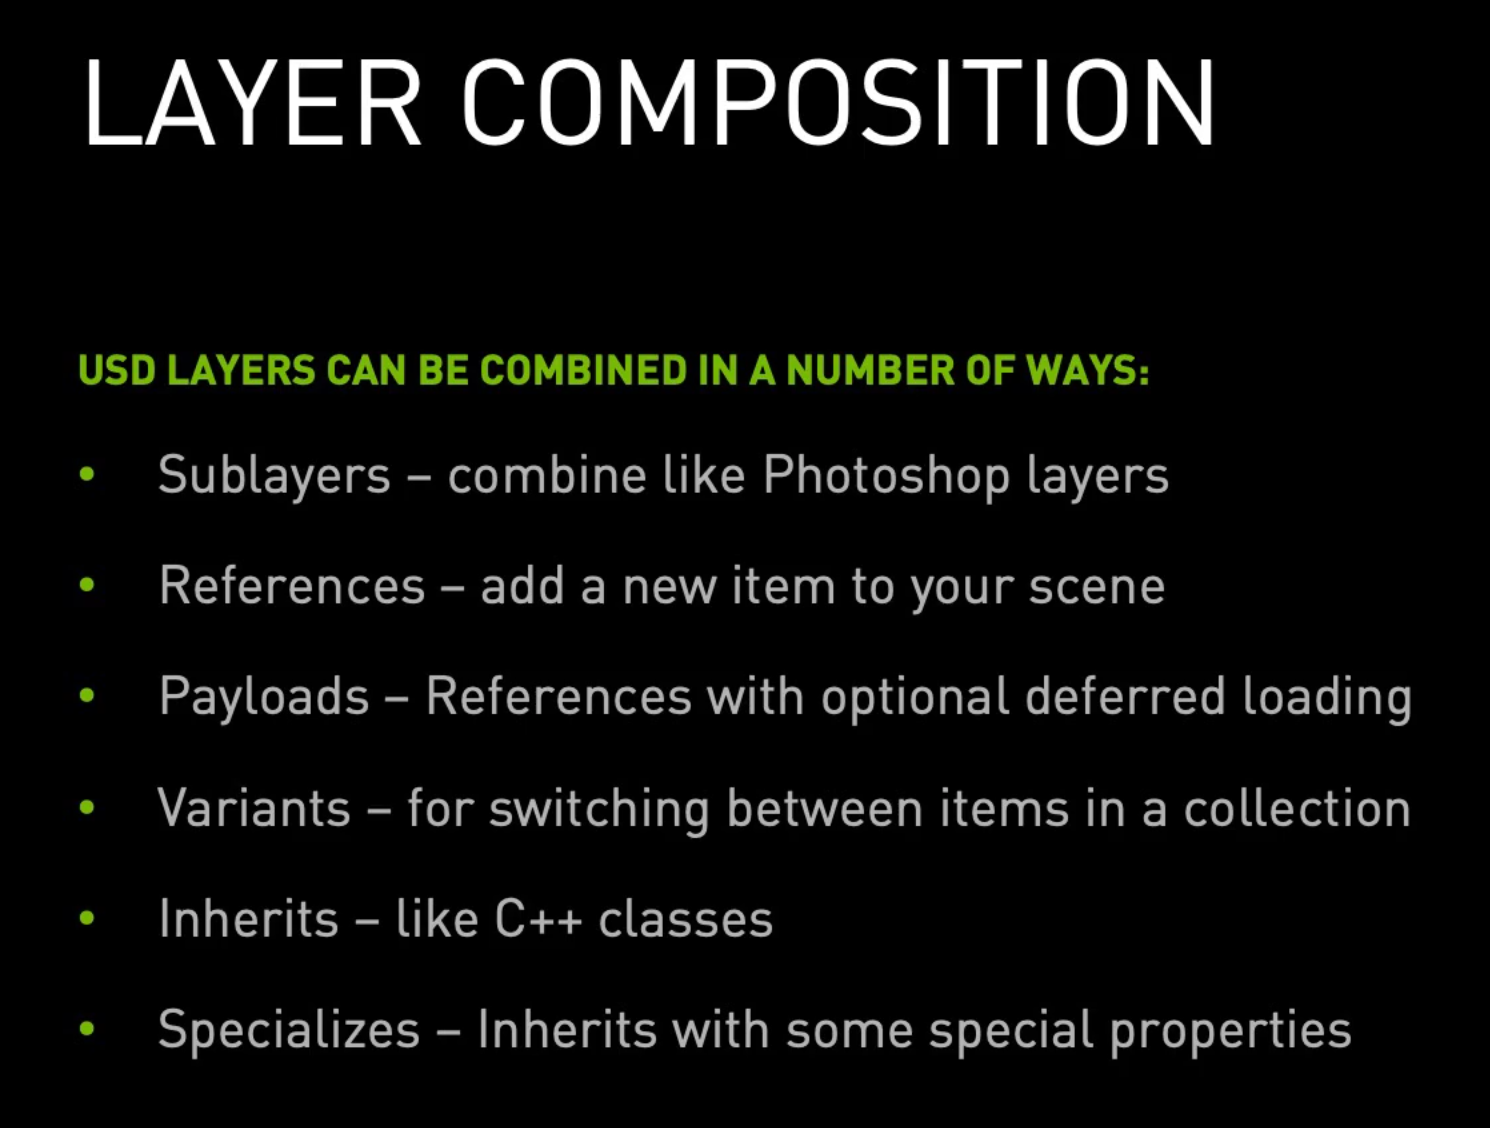

#### Reference would equate to instances (of the original object).

#### Payloads are a sub category of References - in that they can be turned on and off. So References could be indented on this slide.

| Layer Compositions | |
| ----------- | ----------- |
|Sublayers| |
|References| |
|            | Payloads |
|Variants||
|Inherits||
|Specializes||

In this example, there are two overs.

In [1]:
'over Xform "World"'

'over Xform "World"'

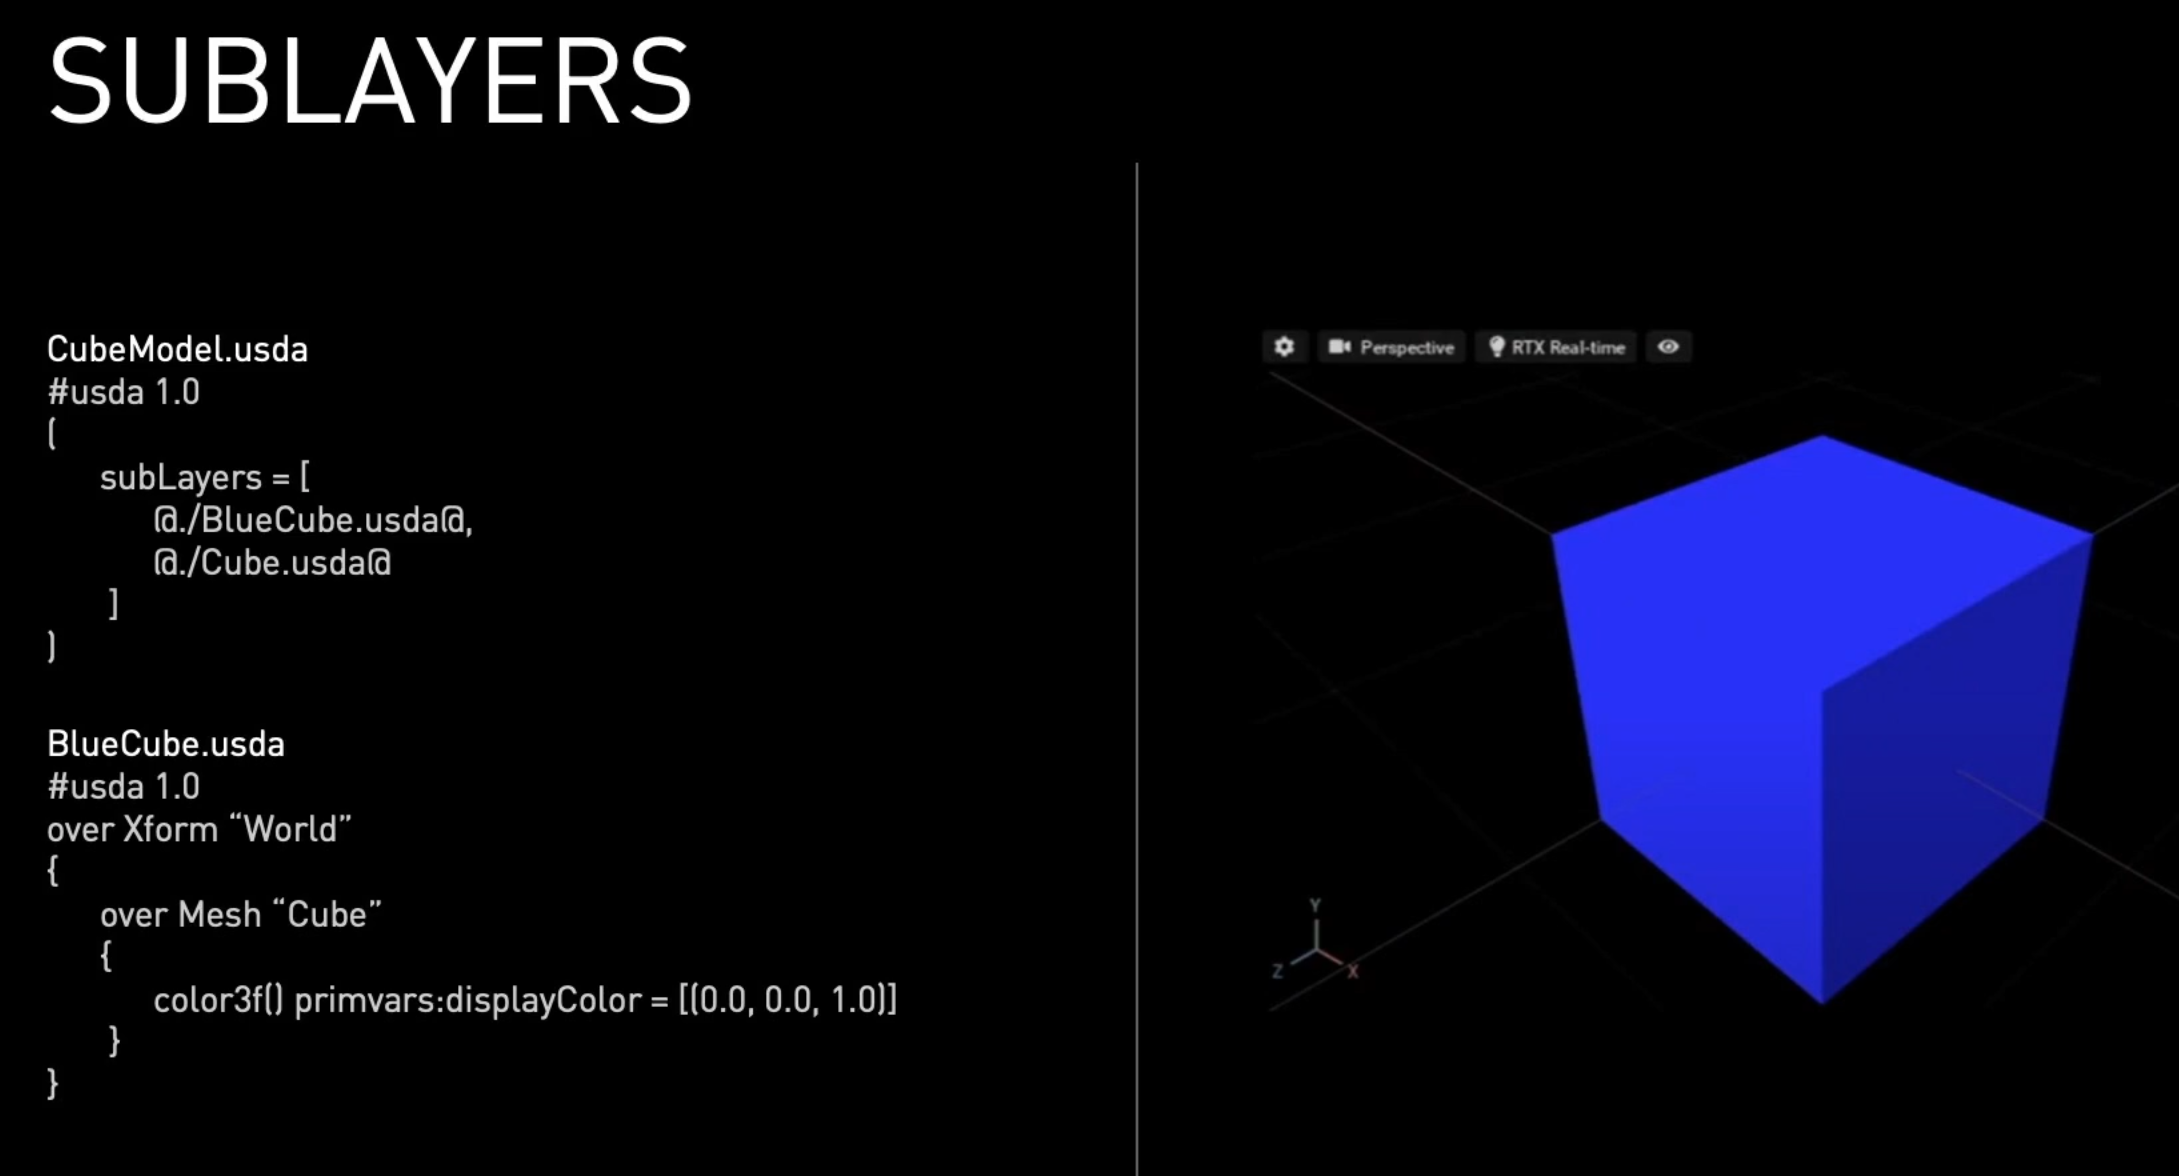

The code below works to play video from the local hardrive.

In [4]:
%%HTML
<video width="1236" height="1008" controls>
  <source src=".\Over_Layers_Red_Blue.mp4" type="video/mp4">
</video>

The '\' could go either way. '/' seems to work as well. I suppose if I learned to import images from my repo into this document rather than embedding them, then I would know the path. 

In [5]:
%%HTML
<video width="1236" height="1008" controls>
  <source src="./Over_Layers_Red_Blue.mp4" type="video/mp4">
</video>

Unfortunately, I would need to upload this file to a cloud host the reference the host - which has not worked using ms One Drive. Or I would need break this down into an animated giph. 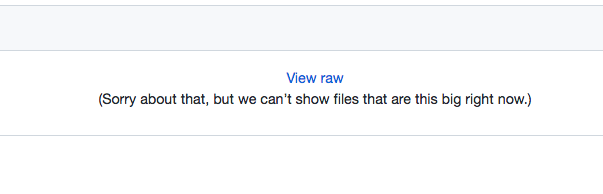

In [7]:
%%HTML
<iframe width=”560" height=”315"
 src=”https://youtube.com/embed/d1NK83vve6c"
</iframe>

I can create sublayers, and I can create references, both of which refer back to the main model. But can References have sublayers? As is, I can use sublayers to change the colors of all the references. And I can set individual colors within the references.

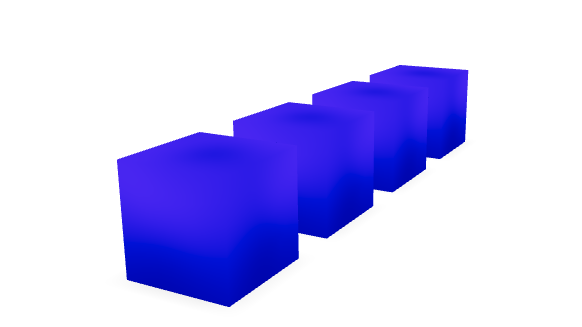

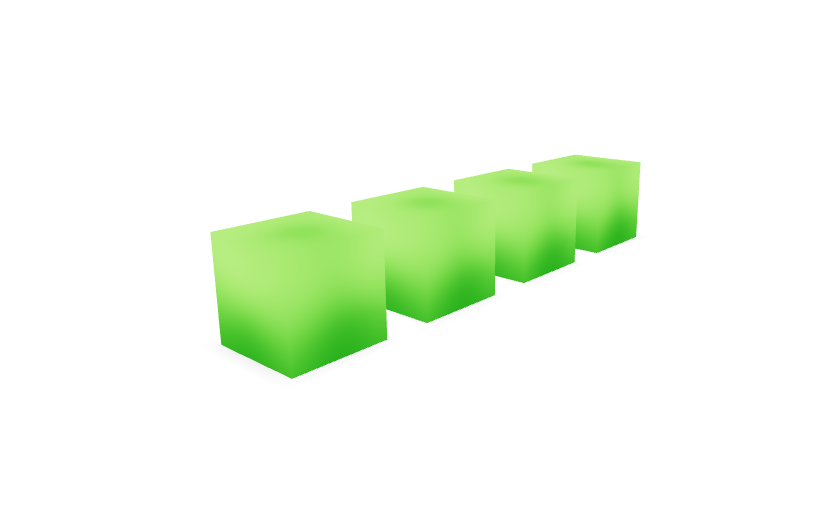

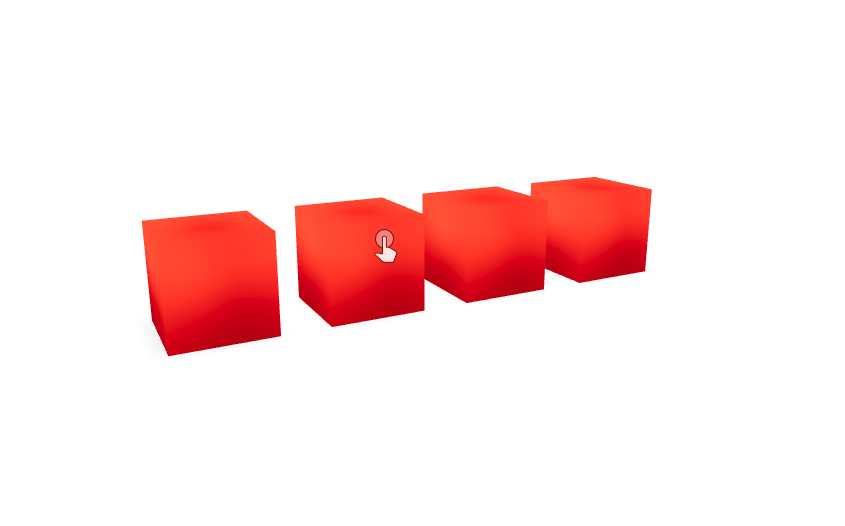

"Each reference is showing which variant it intends to show." This to me implies that each block is a reference.
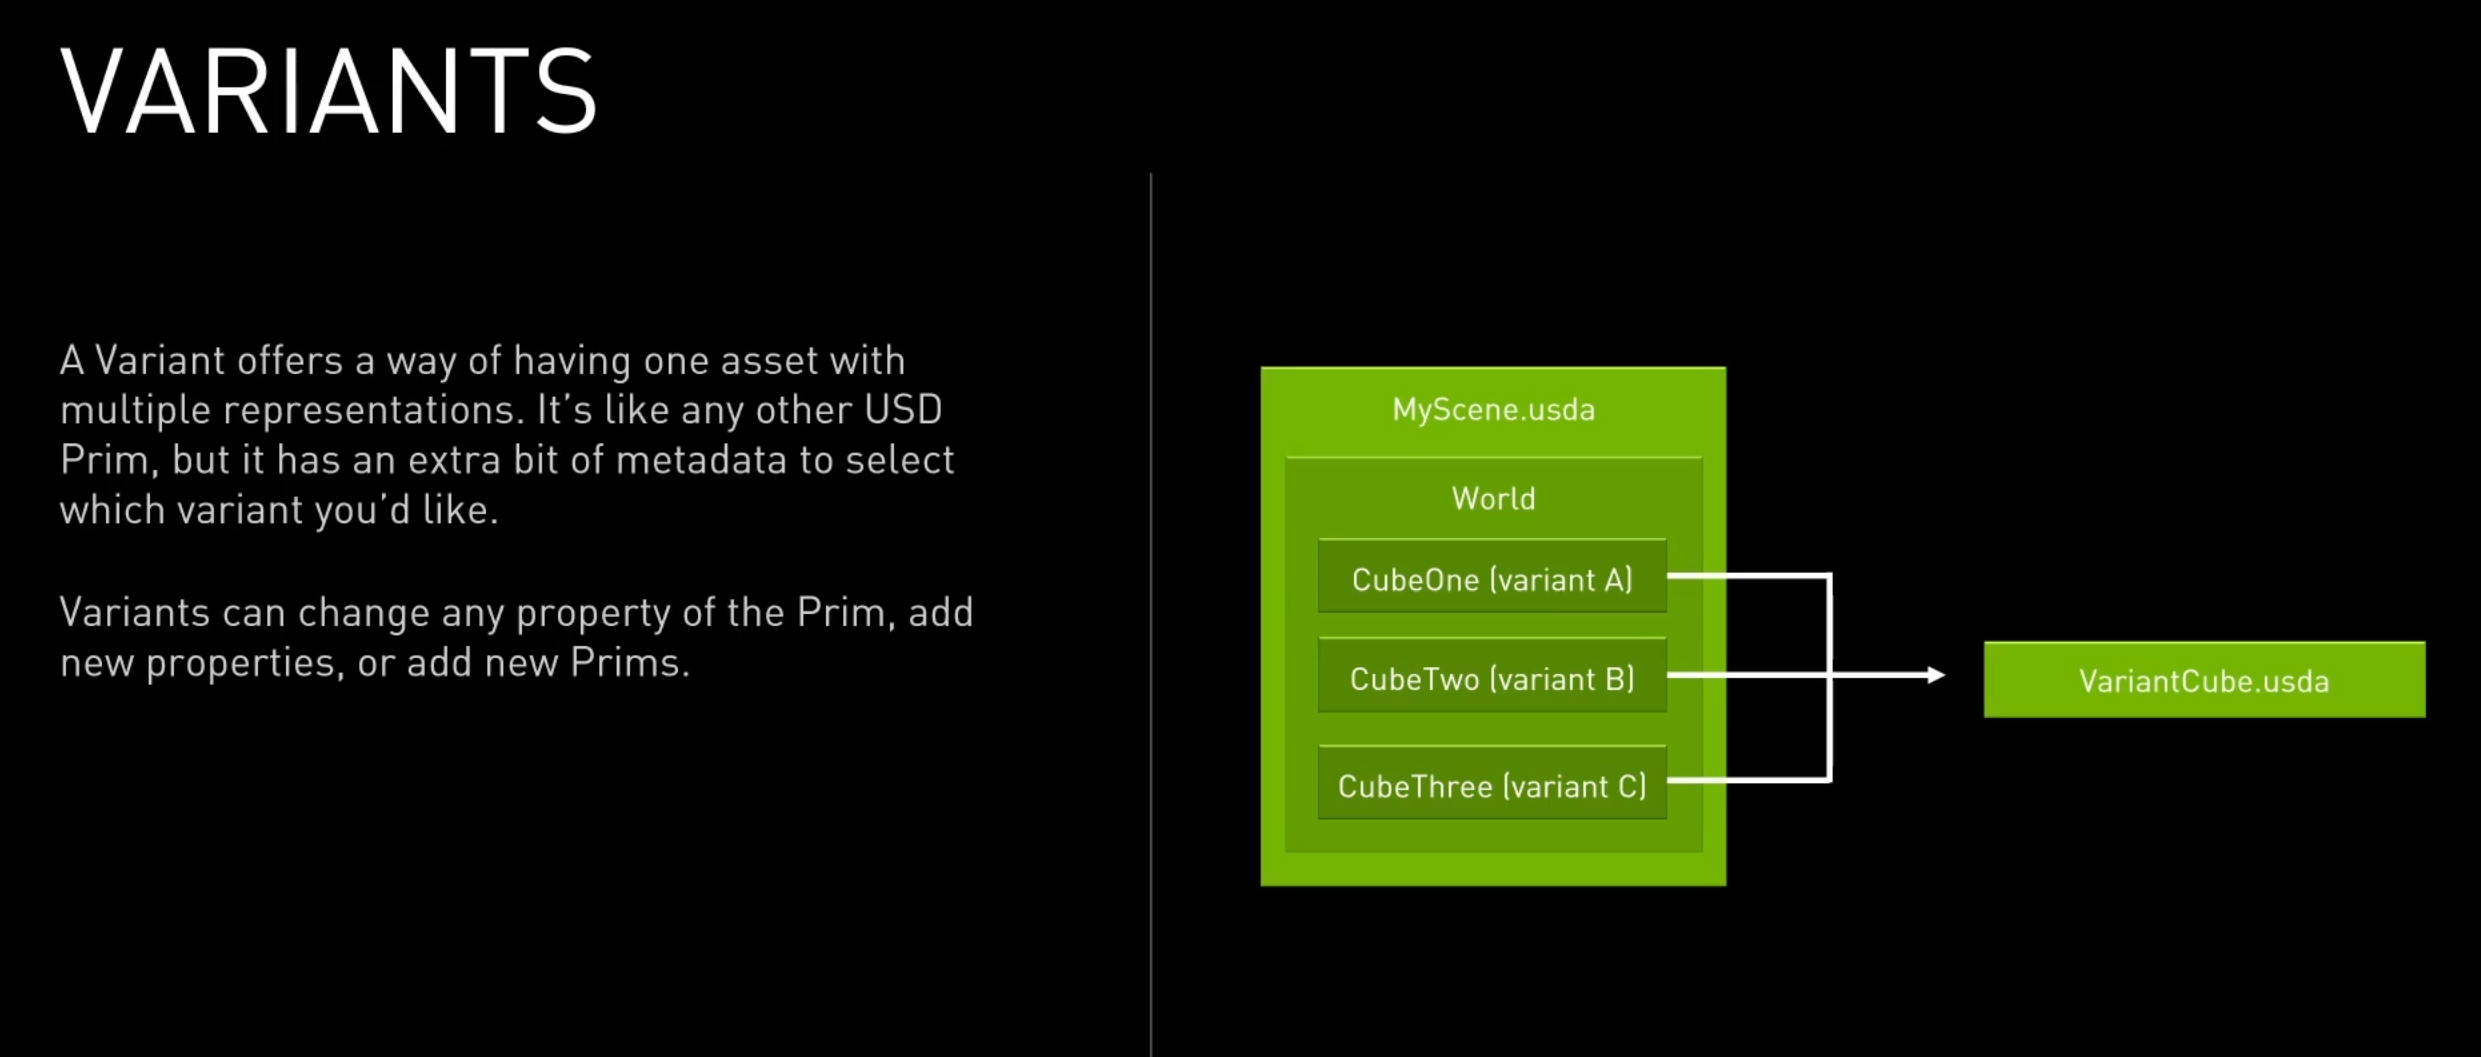

I expect that variants would allow me to change the color of individual cubes, so maybe like inherit from a class. Where the sublayer would be affect instances of the base class. 

In [ ]:
%%file usd_files/usd_fundamentals/cube-variants.usda
#usda 1.0

def Xform "World"
{
  def Xform "Object"(
    variants = {
      # Try changing the shading variant to either "red", "green" or "blue":
      string shadingVariant = "green"
    }
    prepend variantSets = "shadingVariant"
  )
  {
    def "Cube" (references = @./cube-model.usda@</World/Cube>)
    {
      # Coordinates:
      double3 xformOp:translate = (0.0, 0.0, 0.0)
      double3 xformOp:rotateXYZ = (0.0, 45.0, 0.0)
      float3 xformOp:scale = (1.0, 1.0, 1.0)
      uniform token[] xformOpOrder = ["xformOp:translate", "xformOp:rotateXYZ", "xformOp:scale"]
     
      # Colors (set by specifying the "shadingVariant" on the "Cube" above):
      color3f[] primvars:displayColor
    }

    variantSet "shadingVariant" = {
      "red" {
        over "Cube" {
          color3f[] primvars:displayColor = [(1.0, 0.0, 0.0)]
        }
      }

      "green" {
        over "Cube" {
          color3f[] primvars:displayColor = [(0.0, 1.0, 0.0)]
        }
      }

      "blue" {
        over "Cube" {
          color3f[] primvars:displayColor = [(0.0, 0.0, 1.0)]
        }
      }
    }
  }
}

The above code will modify one cube with a variety of colors. 

But what if I want two cubes and want to be able to switch out colors, like a 2x2 state diagram?

|table|description|
|___________|

In [6]:
from pxr import USD
path = base_path + "stages/"
%%file usd_files/advanced_usd/stages/sphere_sample.usda
#usda 1.0

def Sphere "sphere"
{
}
stage = Usd.Stage.CreateNew(path + 'a_new_stage.usd')
stage = Usd.Stage.Open(path + 'sphere_sample.usda')
# Do something to the stage
stage.Save()  


SyntaxError: invalid syntax (27193084.py, line 6)

In [1]:
# The following code can export to .usdc, or .usdz

In [2]:
stage = Usd.Stage.Open(path + 'sphere_sample.usda')
# Do something to the stage
stage.Export(path + 'sphere_sample.usdc')

NameError: name 'Usd' is not defined

### Creating a Layer in USD

USD files represent a layer in the USD lexicon. From the Pixar Glossary:

    A Layer is the atomic persistent container of scene description for USD. A layer contains zero or more PrimSpecs, that in turn describe Property and Metadata values. Each layer possesses an identifier that can be used to construct references to the layer from other layers. Although it may be possible to someday remove this restriction, layers must currently correspond to files on a filesystem accessible via POSIX filesystem interfaces.


### Understanding how References work

One of the most basic and useful tools for composing scenes in USD is the reference.

From the USD Glossary:

    The primary use for References is to compose smaller units of scene description into larger aggregates, building up a namespace that includes the "encapsulated" result of composing the scene description targeted by a reference.


### Understanding Variants

Variants and VariantSets allow a content author to provide a prim with multiple looks or forms with relative ease.

From the USD Glossary:

    A VariantSet is a composition arc that allows a content creator to package a discrete set of alternatives, between which a downstream consumer is able to non-destructively switch, or augment. A reasonable way to think about VariantSets is as a "switchable reference". Each Variant of a VariantSet encapsulates a tree of scene description that will be composed onto the prim on which the VariantSet is defined, when the Variant is selected. VariantSet names must be legal USD identifiers.


### Attributes

Attributes are the workhorse of storing actual data inside a Prim. Attributes are often defined as part of Schemas to make it easier to access context-relevant data from within an instance of that Type.

For example, Xform typed Prims have an attribute called Purpose which is used to specify the purpose of an imageable prim. It contains one of the following values: [default, render, proxy, guide]

We could get this attribute's value in two ways. One, as a generic prim_ref.GetAttribute(name) call, but we would have to know that the exact name of the attribute we want is "purpose", and we wouldn't be able to get any code completion in an IDE that way.

The other way is to use the Xform Schema's exposed function for getting the purpose, which is xform_ref.GetPurposeAttr(), which returns the same object, but will be typed in an IDE and does not depend on the underlying string name of the attribute.

Most often after we get an Attribute object, we will want to get the attribute's actual value or set it. That can be done with attribute_ref.Get() to retrieve the value, and attribute_ref.Set(value) to set the value.

### Hierarchy and Traversal

path = base_path + "hierarchy/"

USD Stages are organized in a hierarchy of Prims: there is a special root prim at / and it may have N-number of direct Prim descendants, each of which can have their own tree of Prim descendants.

The path to a Prim is described by a string which starts with the root prim / and contains the Prim name separated by the path separator / until the last component is the desired Prim's name.

For example /Car/Wheel/Tire refers to the Tire prim which has parent Wheel and grandparent Car. Car's parent is the special root prim /.

In the Tutorial section on Stages there is information on how to retrieve a Prim at a given path using stage_ref.GetPrimAtPath().

Here is a refresher, we'll assume car.usda has the /Car/Wheel/Tire path:

